In [252]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import h5py
%matplotlib inline

In [124]:
freqs = []
before_fiber = []
with open("/home/lattice/Desktop/before_fiber_sp_20200110.csv") as f:
    csv_reader = csv.reader(f, delimiter=",")
    for row in csv_reader:
        freqs.append(float(row[0]))
        before_fiber.append(float(row[1]))
before_fiber = np.array(before_fiber)

In [125]:
freqs2 = []
after_fiber = []
with open("/home/lattice/Desktop/after_fiber_sp_20200110.csv") as f:
    csv_reader = csv.reader(f, delimiter=",")
    for row in csv_reader:
        freqs2.append(float(row[0]))
        after_fiber.append(float(row[1]))
after_fiber = np.array(after_fiber)

In [126]:
freqs3 = []
before_fiber_compact = []
with open("/home/lattice/Desktop/before_fiber_compact_sp_20200113.csv") as f:
    csv_reader = csv.reader(f, delimiter=",")
    for row in csv_reader:
        freqs3.append(float(row[0]))
        before_fiber_compact.append(float(row[1]))
before_fiber_compact = np.array(before_fiber_compact)

In [127]:
freqs4 = []
after_fiber_compact = []
with open("/home/lattice/Desktop/after_fiber_compact_sp_20200113.csv") as f:
    csv_reader = csv.reader(f, delimiter=",")
    for row in csv_reader:
        freqs4.append(float(row[0]))
        after_fiber_compact.append(float(row[1]))
after_fiber_compact = np.array(after_fiber_compact)

In [128]:
before_fiber /= np.max(before_fiber)
after_fiber /= np.max(after_fiber)
before_fiber_compact /= np.max(before_fiber_compact)
after_fiber_compact /= np.max(after_fiber_compact)

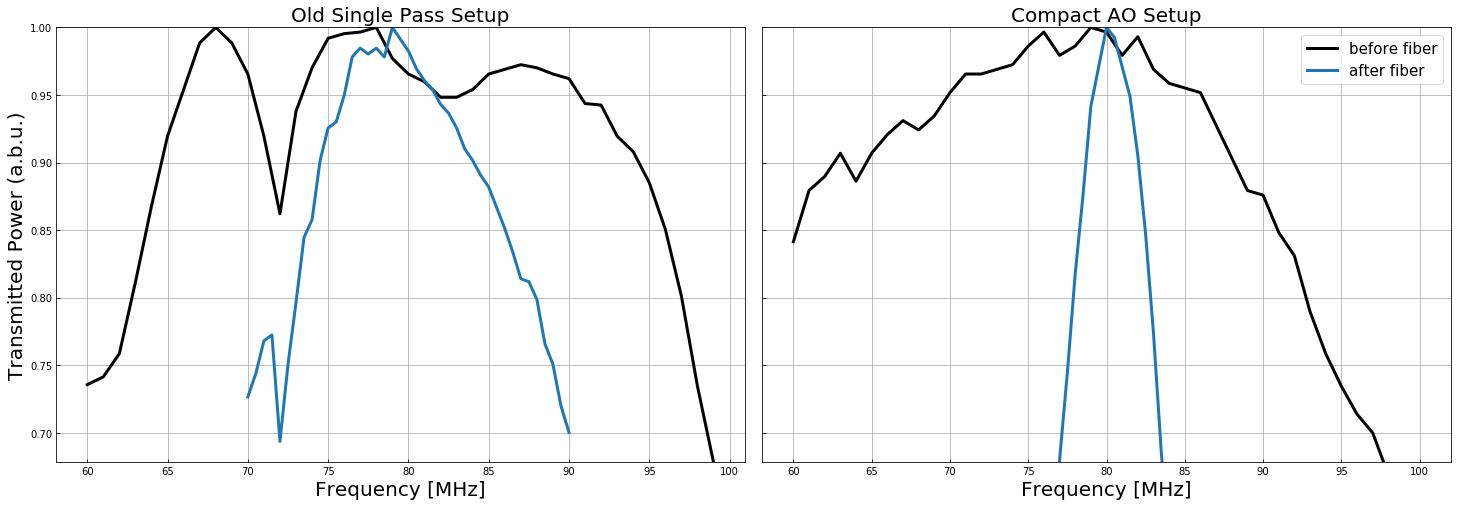

In [136]:
fig, ax = plt.subplots(1, 2, figsize=(25,8), sharey=True)
ax[0].plot(freqs, before_fiber, color="k", label="before fiber", lw=3)
ax[0].plot(freqs2, after_fiber, color="C0", label="after fiber", lw=3)
ax[1].plot(freqs3, before_fiber_compact, color="k", label="before fiber", lw=3)
ax[1].plot(freqs4, after_fiber_compact, color="C0", label="after fiber", lw=3)
ax[0].set_ylim(np.min(list(before_fiber) + list(after_fiber)), 1)
ax[0].set_xlabel("Frequency [MHz]", fontsize=20)
ax[0].set_ylabel("Transmitted Power (a.b.u.)", fontsize=20)
ax[1].legend(fontsize=15)
ax[0].set_title("Old Single Pass Setup", fontsize=20)
ax[1].set_title("Compact AO Setup", fontsize=20)
ax[1].set_xlabel("Frequency [MHz]", fontsize=20)
plt.subplots_adjust(wspace=0.025, hspace=0.025)
ax[0].tick_params(which="both", direction="in")
ax[1].tick_params(which="both", direction="in")
ax[0].grid(True)
ax[1].grid(True)
plt.savefig("/home/lattice/Desktop/beam_path_comparisons.png")
plt.show()

In [241]:
t = np.linspace(0, 4, 100)
tultra = np.linspace(0, 4, 1000)
def f(Ω, t):
    return np.sin(2 * np.pi * Ω * t)**2

In [242]:
Ω_02 = np.random.normal(1, 0.01, 1000)
y_02 = [0 for i in range(100)]
for ω in Ω_02:
    y_02 += f(ω, t)
y_02 /= 1000

Ω_06 = np.random.normal(1, 0.03, 1000)
y_06 = [0 for i in range(100)]
for ω in Ω_06:
    y_06 += f(ω, t)
y_06 /= 1000

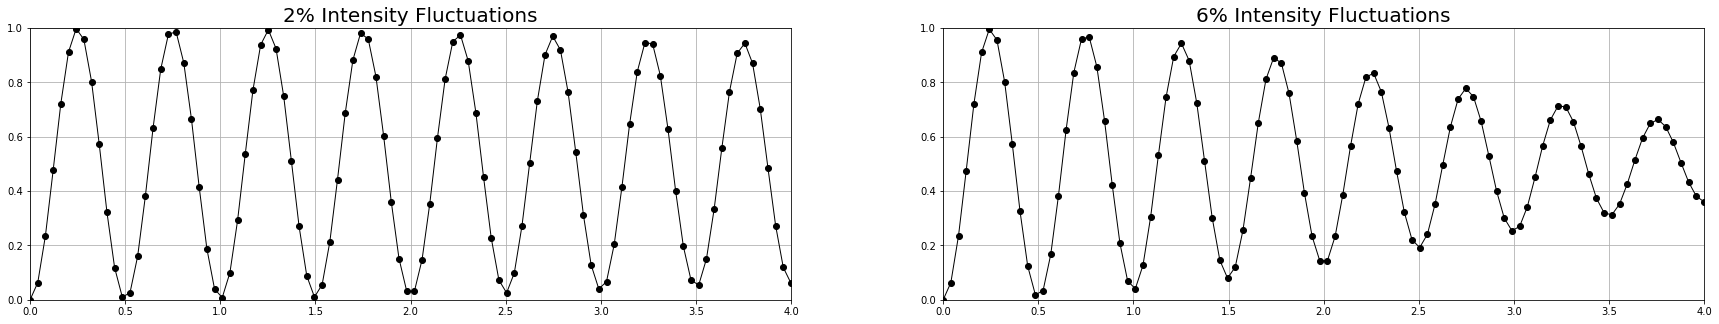

In [254]:
fig, ax = plt.subplots(1, 2, figsize=(30, 5))
# ax.plot(tultra, f(Ω[0], tultra))
ax[0].plot(t, y_02, marker="o", lw=1, color="k")
ax[0].set_ylim(0, 1)
ax[0].set_xlim(0, 4)
ax[0].grid(True)
ax[0].set_title("2% Intensity Fluctuations", fontsize=20)
ax[1].plot(t, y_06, marker="o", lw=1, color="k")
ax[1].set_ylim(0, 1)
ax[1].set_xlim(0, 4)
ax[1].grid(True)
ax[1].set_title("6% Intensity Fluctuations", fontsize=20)
plt.savefig("/home/lattice/Desktop/sumanta_plot.pdf")
plt.show()

In [237]:
with h5py.File("/home/lattice/data/2020-01-21/RabiFlopping/2246_16.h5", 'r') as f:
    # List all groups
    x = f["scan_data"]["RabiFlopping.duration"][:]
    y = f["scan_data"]["RabiFlopping-ion number:1"][:]


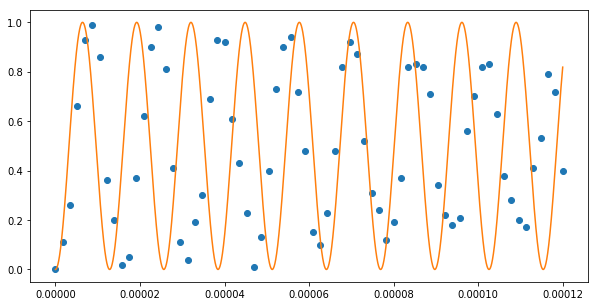

In [249]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x, y, marker="o", lw=0)
tt = np.linspace(0, .00012, 10000)
ax.plot(tt, f(3.9e4, tt))